In [1]:
import numpy as np
import pandas as pd

from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [104]:
cov = pd.read_csv('corona2.csv')

In [105]:
cov.head()

,%,Dia,Casos,Unnamed: 3,China,K,Alpha,Beta,Unnamed: 8,Italia,K.1,Alpha.1,Beta.1,Unnamed: 13,Unnamed: 14,Unnamed: 15,Portugal,K.2,Alpha.2,Beta.2
0,NaN,2,2.0,NaN,278.027361,81077,0.2836,22,NaN,2.023939,35000,0.238,43,NaN,2,2.0,3.939708,2900,0.33,22
1,100.000000,3,4.0,NaN,368.778329,81077,0.2836,22,NaN,2.567750,35000,0.238,43,NaN,3,4.0,5.477099,2900,0.33,22
2,50.000000,4,6.0,NaN,488.972075,81077,0.2836,22,NaN,3.257664,35000,0.238,43,NaN,4,6.0,7.612849,2900,0.33,22
3,50.000000,5,9.0,NaN,648.025321,81077,0.2836,22,NaN,4.132924,35000,0.238,43,NaN,5,9.0,10.578373,2900,0.33,22
4,44.444444,6,13.0,NaN,858.264542,81077,0.2836,22,NaN,5.243313,35000,0.238,43,NaN,6,13.0,14.693225,2900,0.33,22


In [106]:
casos = np.array(cov['Casos'])

In [107]:
casos

array([   2.,    4.,    6.,    9.,   13.,   21.,   30.,   39.,   41.,
         59.,   78.,  112.,  169.,  245.,  331.,  448.,  642.,  785.,
       1020., 1280.,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan])

In [6]:
def deriv(X, t):
    S, E, I, R = X 
    
    b = r0*g
    
    dS = -b*S*I/N
    dE = b*S*I/N - s*E
    dI = s*E-g*I
    dR = g*I
    
    return [dS, dE, dI, dR]

In [105]:
# Establish initial conditions

m = pow(10,6)
N = 11*m 

S = 11*m  
I = 17
E = 20*I
R = 0

s = 1/5.2
g = 1/18 




In [106]:
# Phase 1

X = S, E, I, R

r0 = 3.1

phas1 = odeint(deriv, X, np.linspace(1,54, 54))
phas1 = np.around(phas1)

In [107]:
phas1[-1]

array([1.0982159e+07, 4.9220000e+03, 7.5170000e+03, 5.7600000e+03])

In [108]:
# Phase 2

X = phas1[-1]

r0 = 2.6

phas2 = odeint(deriv, X , np.linspace(1, 11, 11))
phas2 = np.around(phas2)

In [109]:
phas2[-1]

array([1.096719e+07, 7.961000e+03, 1.367600e+04, 1.153000e+04])

In [566]:
# Phase 3

X = phas2[-1]

r0 = 1.9

phas3 = odeint(deriv, X , np.linspace(1, 14, 14))
phas3 = np.around(phas3)

In [567]:
phas3[-1]

array([10865415.,    24639.,    53053.,    57732.])

In [568]:
# Phase 4

X = phas3[-1]

r0 = 0.9

phas4 = odeint(deriv, X , np.linspace(1, 10, 10))
phas4 = np.around(phas4)

In [569]:
phas4[-1]

array([10840184.,    16473.,    58035.,    86147.])

In [111]:
# Caso portugues

m = pow(10,6)
N = 10.5*m 

S = 10.5*m  
I = 40
E = 20*I
R = 0

s = 1/5.2
g = 1/18 




# Phase 1

X = S, E, I, R

r0 = 3.1

phas1_por = odeint(deriv, X, np.linspace(1,20, 20))
phas1_por = np.around(phas1_por)


In [112]:
phas1_por[-1]

array([1.0497299e+07, 1.0580000e+03, 1.6120000e+03, 8.7100000e+02])

<BarContainer object of 20 artists>

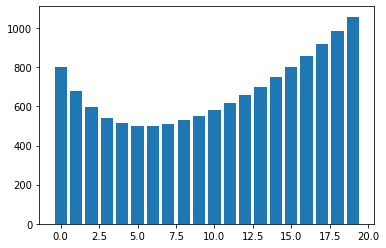

In [113]:
 plt.bar(range(len(phas1_por[:,1])), phas1_por[:,1])

<BarContainer object of 20 artists>

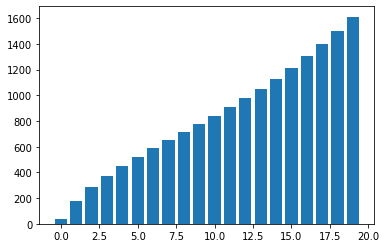

In [114]:
 plt.bar(range(len(phas1_por[:,2])), phas1_por[:,2])

In [115]:
# Phase 2

X = phas1_por[-1]

r0 = 2.5

phas2_por = odeint(deriv, X , np.linspace(1, 6, 6))
phas2_por = np.around(phas2_por)

In [116]:
phas2_por[-1]

array([1.0495982e+07, 1.2710000e+03, 2.1890000e+03, 1.3980000e+03])

In [117]:
# Phase 3

X = phas2_por[-1]

r0 = 1.9

phas3_por = odeint(deriv, X , np.linspace(1, 5, 5))
phas3_por = np.around(phas3_por)

In [118]:
phas3_por[-1]

array([1.0494962e+07, 1.3090000e+03, 2.6340000e+03, 1.9350000e+03])

In [126]:
# Phase 4

X = phas3_por[-1]

r0 = 0.9

phas4_por = odeint(deriv, X , np.linspace(1, 45, 45))
phas4_por = np.around(phas4_por)

In [127]:
phas4_por[:,2]

array([2634., 2726., 2795., 2847., 2884., 2910., 2928., 2940., 2945.,
       2947., 2946., 2942., 2936., 2929., 2920., 2911., 2901., 2890.,
       2879., 2868., 2856., 2844., 2832., 2820., 2808., 2796., 2784.,
       2772., 2760., 2748., 2736., 2724., 2712., 2700., 2688., 2676.,
       2664., 2653., 2641., 2629., 2618., 2606., 2595., 2583., 2572.])

In [128]:
# Phase 5

X = phas4_por[-1]

r0 = 0.9

phas5_por = odeint(deriv, X , np.linspace(1, 90, 90))
phas5_por = np.around(phas5_por)

In [129]:
phas5_por[:,2]

array([2572., 2561., 2549., 2538., 2527., 2516., 2505., 2494., 2483.,
       2472., 2461., 2450., 2439., 2428., 2417., 2407., 2396., 2385.,
       2375., 2364., 2354., 2343., 2333., 2323., 2312., 2302., 2292.,
       2282., 2272., 2262., 2252., 2242., 2232., 2222., 2212., 2202.,
       2192., 2183., 2173., 2163., 2154., 2144., 2135., 2125., 2116.,
       2106., 2097., 2088., 2078., 2069., 2060., 2051., 2042., 2033.,
       2024., 2015., 2006., 1997., 1988., 1979., 1970., 1962., 1953.,
       1944., 1936., 1927., 1918., 1910., 1901., 1893., 1884., 1876.,
       1868., 1859., 1851., 1843., 1835., 1827., 1818., 1810., 1802.,
       1794., 1786., 1778., 1770., 1762., 1755., 1747., 1739., 1731.])

In [130]:
[i for i, j in enumerate(phas4_por[:,2]) if j == max(phas4_por[:,2])]

[9]

In [131]:
infectious = np.concatenate((phas1_por[:,2], phas2_por[:,2], phas3_por[:,2], phas4_por[:,2], phas5_por[:,2]))    

In [132]:
print(infectious)

[  40.  175.  284.  375.  453.  523.  589.  651.  713.  775.  839.  906.
  976. 1051. 1129. 1213. 1303. 1399. 1502. 1612. 1612. 1725. 1838. 1952.
 2069. 2189. 2189. 2308. 2420. 2528. 2634. 2634. 2726. 2795. 2847. 2884.
 2910. 2928. 2940. 2945. 2947. 2946. 2942. 2936. 2929. 2920. 2911. 2901.
 2890. 2879. 2868. 2856. 2844. 2832. 2820. 2808. 2796. 2784. 2772. 2760.
 2748. 2736. 2724. 2712. 2700. 2688. 2676. 2664. 2653. 2641. 2629. 2618.
 2606. 2595. 2583. 2572. 2572. 2561. 2549. 2538. 2527. 2516. 2505. 2494.
 2483. 2472. 2461. 2450. 2439. 2428. 2417. 2407. 2396. 2385. 2375. 2364.
 2354. 2343. 2333. 2323. 2312. 2302. 2292. 2282. 2272. 2262. 2252. 2242.
 2232. 2222. 2212. 2202. 2192. 2183. 2173. 2163. 2154. 2144. 2135. 2125.
 2116. 2106. 2097. 2088. 2078. 2069. 2060. 2051. 2042. 2033. 2024. 2015.
 2006. 1997. 1988. 1979. 1970. 1962. 1953. 1944. 1936. 1927. 1918. 1910.
 1901. 1893. 1884. 1876. 1868. 1859. 1851. 1843. 1835. 1827. 1818. 1810.
 1802. 1794. 1786. 1778. 1770. 1762. 1755. 1747. 17

<BarContainer object of 166 artists>


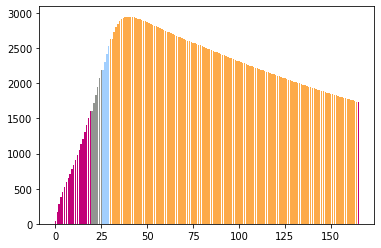

In [135]:
colors = np.concatenate((['xkcd:magenta']*20, ['xkcd:grey']*6, ['xkcd:baby blue']*4, ['xkcd:light orange']*45, ['xkcd:light orange']*90))

bar_graph = plt.bar(range(len(infectious)), infectious, color= colors)

print(bar_graph)

<BarContainer object of 105 artists>

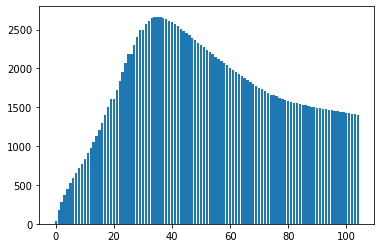

In [73]:
 plt.bar(range(len(infectious)), infectious)

In [1021]:
np.zeros(12)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [108]:
confirmados = np.concatenate((np.zeros(12), casos))

<BarContainer object of 68 artists>

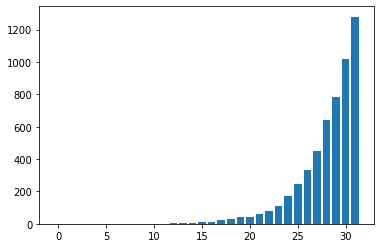

In [109]:
 plt.bar(range(len(confirmados)), confirmados)

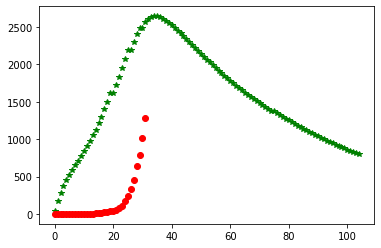

In [110]:
plt.plot(infectious,'g*', confirmados, 'ro')
plt.show()